# VLE of glassy polymers

This is an example for a VLE calculation featuring a polymer and a solvent. PC-SAFT calculation for a water sorption isotherm of the polymer PVP were performed (the dotted line in Figure 2 of https://doi.org/10.3390/membranes12040434). 

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,NETVLE
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar


The the first part of the code is basically the same as presented in VLE_Water_Sorption_Polymer_part1.ipynb

In [2]:

par={'kij':np.asarray([-0.045000,-0.022000,-0.128000,-0.001000,0.002673,-0.062100]),
'kijA':np.asarray([0,0,0,0,-0.455211419,0]),
'Mi':np.asarray([18.015,46.069,357.79,65000.]),
'mi':np.asarray([1.2047,2.3827,14.283,2420.99]),
'si':np.asarray([2.79533,3.1771,3.535,2.947]),
'ui':np.asarray([353.95,198.24,262.791,205.27]),
'eAi':np.asarray([2425.7,2653.4,886.4,0.]),
'kAi':np.asarray([0.045099,0.032384,0.02,0.02]),
'NAi':np.asarray([1.,1.,3.,653.])}


In [3]:
netpar={'ksw':np.asarray([0.,0.,0.,0.,0.,0]),
'v0p' : np.asarray([-1.,-1.,0.,793.7*1E-6])}


D:\Temp\ipykernel_12340\2534653348.py:19: RuntimeWarning: divide by zero encountered in log
  RS=NETVLE(T,wi,**netpar,**par,n=1) if NET else np.exp(lngi(T,wi,**par)+np.log(wi))[:2]
C:\GitHub_Projects\diffusionpy\diffusionpy\PCSAFT.py:169: RuntimeWarning: invalid value encountered in log
  return logRS-np.log(RS)


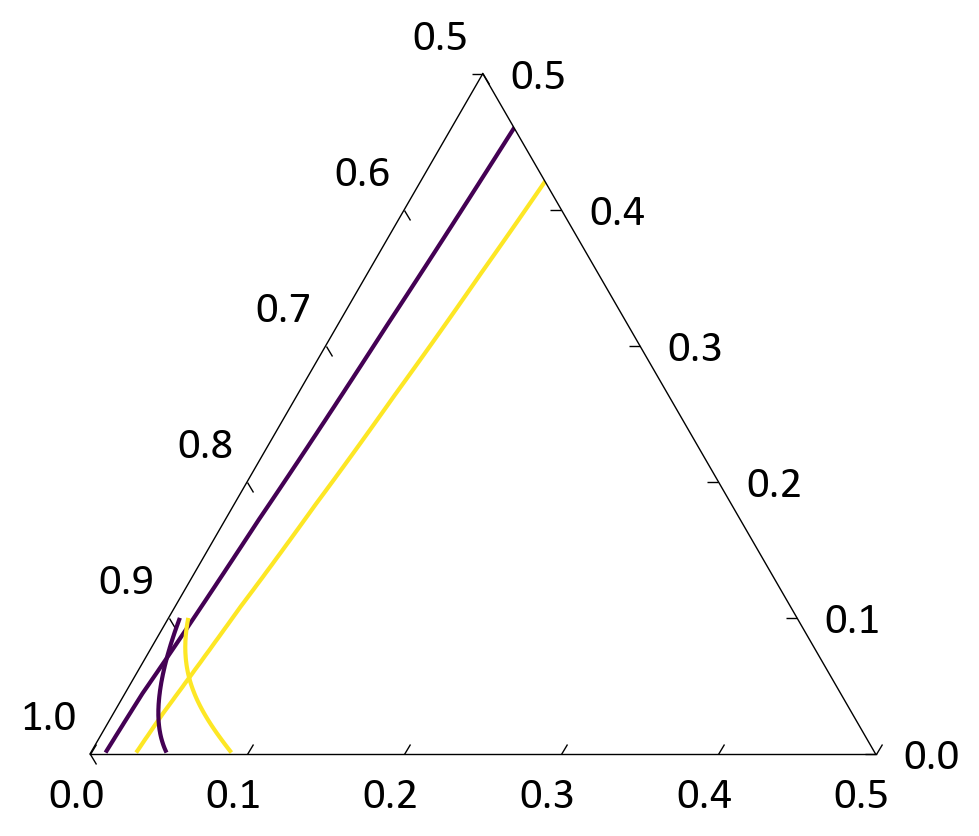

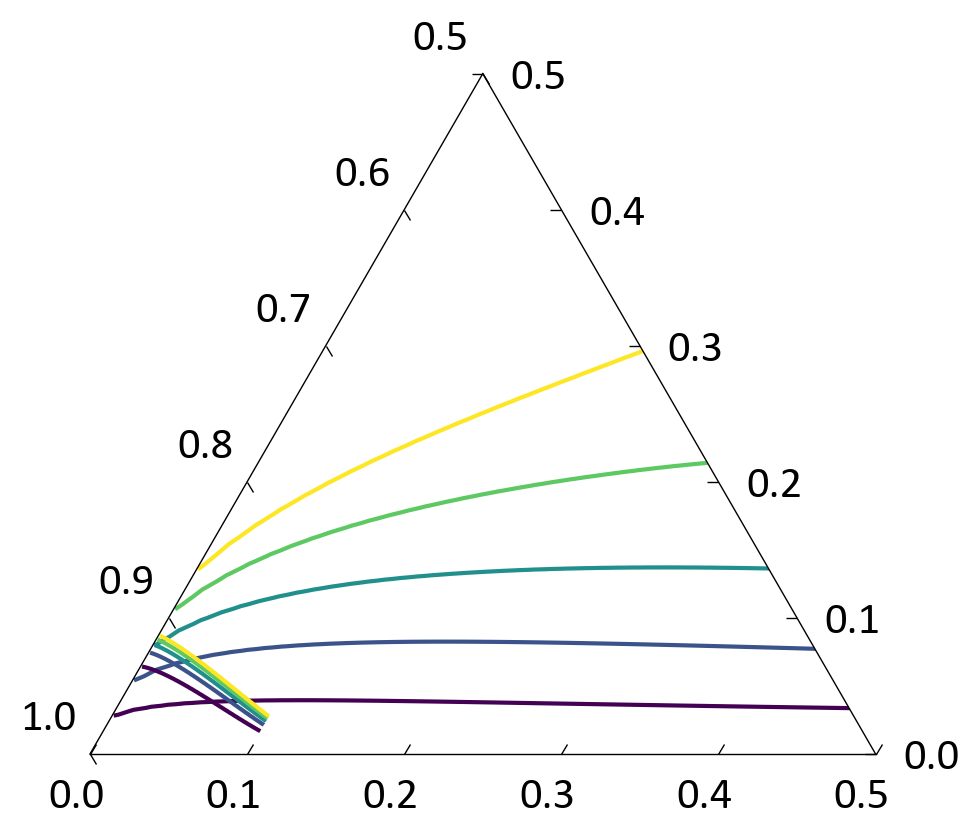

In [4]:
T=303.15
p=1E5
npoint=50
DL=0

wwNET=np.linspace(0.001,0.1,npoint)
weNET=np.linspace(0.001,0.1,npoint)
wwSAFT=np.linspace(0.001,0.5,npoint)
weSAFT=np.linspace(0.001,0.5,npoint)
def isotherm(ww,we,NET=False):
    RSvec=[]
    wwvec=[]
    wevec=[]
    for i,vali in enumerate(ww):
        for i,valj in enumerate(we):
            wASD=(1-vali-valj)
            par['vpure']=vpure(p,T,**par)
            wi=np.asarray([vali,valj,wASD*DL,wASD*(1-DL)])
            RS=NETVLE(T,wi,**netpar,**par,n=1) if NET else np.exp(lngi(T,wi,**par)+np.log(wi))[:2]
            RSvec.append(RS)
            wwvec.append(vali)
            wevec.append(valj)
    wwvec=np.asarray(wwvec)
    wevec=np.asarray(wevec)
    RSvec=np.fmin(np.fmax(np.asarray(RSvec),0),1)
    return wevec,wwvec,RSvec
wevec,wwvec,RSvec=isotherm(wwSAFT,weSAFT,NET=False)
figt1,axt1= plt.subplots(figsize=(6,5),subplot_kw=dict(projection='tern'),dpi=200)
figt2,axt2= plt.subplots(figsize=(6,5),subplot_kw=dict(projection='tern'),dpi=200)
cs1=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,0],levels=[0.3,0.5])
cs2=axt2.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,1],levels=[0.1,0.2,0.3,0.4,0.5])
# cax1 = axt1.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt1.transAxes)
# cax2 = axt2.inset_axes([1.05, 0.1, 0.05, 0.9], transform=axt2.transAxes)
axt1.set_ternary_lim(0, 0.5,  0.5, 1,  0, 0.5)
axt2.set_ternary_lim(0, 0.5,  0.5, 1,  0, 0.5)
wevec,wwvec,RSvec=isotherm(wwNET,weNET,NET=True)
cs3=axt1.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,0],levels=[0.3,0.5])
cs4=axt2.tricontour(wevec,1-wevec-wwvec,wwvec,  RSvec[:,1],levels=[0.1,0.2,0.3,0.4,0.5])

plt.show()